### Clasificacion de Ingresos

Informacion del censo de USA con diferentes tipos de variables que nos va a permitir evaluar si una persona puede ganar mas o menos de 50K

In [1]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Importando Datos

In [3]:
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df_census.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_census.shape

(32560, 15)

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
             'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df_census.columns = col_names


In [6]:
df_census.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [8]:
# exploramos un poco mas la variable target

df_census['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [9]:
# Verificamos los valores missing

df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Procesamiento de datos

In [10]:
# Separamos en X en y

X = df_census.drop(['salary'], axis=1)
y = df_census['salary']


In [11]:
# Importamos las librerias necesarias para la creacion del modelo

from sklearn.model_selection import train_test_split

# 30 % para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42)


In [12]:
# veamos que obtuvimos

X_train.shape, X_test.shape

((22792, 14), (9768, 14))

In [13]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21385,32,Private,732102,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States
19749,23,Private,72887,HS-grad,9,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,0,1,Vietnam
1216,33,?,163003,HS-grad,9,Divorced,?,Not-in-family,Asian-Pac-Islander,Female,0,0,41,China
30048,56,Federal-gov,187873,Masters,14,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
23077,50,Private,43764,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States


In [14]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

## Entrenamiento de modelo de clasificacion con arbol de decision

In [15]:
# Importamos todos nuestros tipos de datos son object, realizamos una transformacion 


import category_encoders as ce # pip install category-encoders

encoder = ce.OrdinalEncoder(cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [17]:
# Verificamos la transformacion

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21385,32,1,732102,1,13,1,1,1,1,1,0,0,40,1
19749,23,1,72887,2,9,1,2,2,2,1,0,0,1,2
1216,33,2,163003,2,9,2,3,1,2,2,0,0,41,3
30048,56,3,187873,3,14,2,4,3,1,2,0,0,40,1
23077,50,1,43764,4,16,3,5,4,1,1,15024,0,50,1


In [18]:
# Importamos el arbol de decision

from sklearn.tree import DecisionTreeClassifier

# Creacion de modelo

tree = DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
# Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
# Calculo de predicciones en Train y en Test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree  = tree.predict(X_test)


In [21]:
y_train_pred_tree # estas son las prediciones

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Evaluacion de modelo de clasificacion con arbol de decision

In [22]:
# Calculo de metricas

from sklearn.metrics import accuracy_score

# Calculo de accuracy en train

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Calculo de accuracy en test

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print('El accuracy en test es: ', test_accuracy_tree)



El accuracy en train es:  0.8427079677079677
El accuracy en test es:  0.7319819819819819


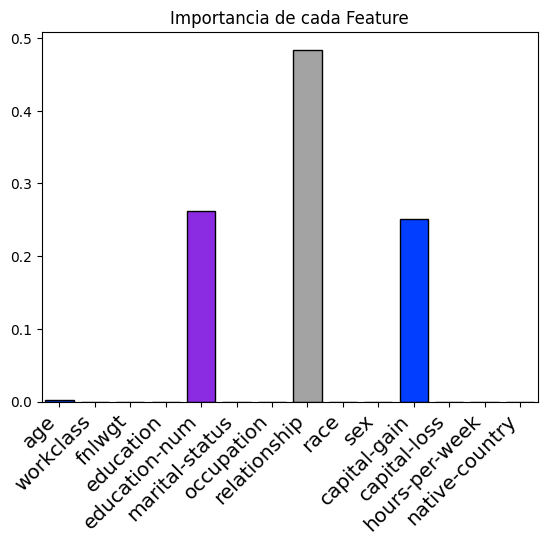

In [23]:
# Verifiquemos el feature importances

import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

sns.barplot(x=columns, y=importances, palette= 'bright', saturation = 1.0, edgecolor = 'black', linewidth=1)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=45, horizontalalignment = 'right', fontweight = 'light', fontsize ='x-large')
plt.show()


## Entrenamiento de model de clasificacion con random forest

In [25]:
# Importar Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 00000)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
# Calculo de las prediciones de Train y Test


y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


## Evaluacion del modelo de clasificacion con random forest

In [27]:
# Calculo de metricas


from sklearn.metrics import accuracy_score

# Calculo de accuracy en Train

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculo de Accuracy en Test

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es: ', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)


El accuracy en train es:  0.9893383643383643
El accuracy en test es: 0.7705773955773956


In [30]:
# Visualizamos los Features Importantes

features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

fnlwgt            0.163642
age               0.152024
capital-gain      0.107629
education-num     0.093549
relationship      0.092994
hours-per-week    0.091094
marital-status    0.077815
occupation        0.071249
workclass         0.038309
capital-loss      0.037275
education         0.032706
native-country    0.016645
race              0.013497
sex               0.011572
dtype: float64

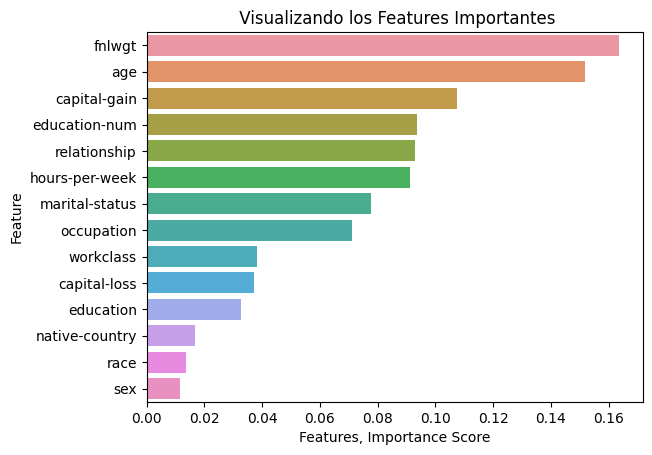

In [31]:
# Grafico de barras

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = features_scores, y = features_scores.index)
plt.xlabel('Features, Importance Score')
plt.ylabel('Feature')
plt.title(' Visualizando los Features Importantes')
plt.show()

In [33]:
# Matriz de confusion RF

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print('Matrix de confusion\n\n', cm)

Matrix de confusion

 [[7060  335]
 [1906  467]]


In [35]:
# RF

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))



              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.86      7395
        >50K       0.58      0.20      0.29      2373

    accuracy                           0.77      9768
   macro avg       0.68      0.58      0.58      9768
weighted avg       0.74      0.77      0.72      9768

